In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stats

import os
print(os.getcwd())
os.chdir("D:\Python Anaconda Navigator")
# Load the dataset
data = pd.read_csv("Sales Data.csv")
data


D:\Python Anaconda Navigator


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [20]:
# Display the first few rows and summary statistics
print(data.head())
print(data.describe())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [49]:

# Handle missing values
missing_values = data.isnull()
print(missing_values)
print(data.isnull().sum())
print(data.info())
# There is not have any missing values

        Unnamed: 0  Order ID  Product  Quantity Ordered  Price Each  \
0            False     False    False             False       False   
1            False     False    False             False       False   
2            False     False    False             False       False   
3            False     False    False             False       False   
4            False     False    False             False       False   
...            ...       ...      ...               ...         ...   
185945       False     False    False             False       False   
185946       False     False    False             False       False   
185947       False     False    False             False       False   
185948       False     False    False             False       False   
185949       False     False    False             False       False   

        Order Date  Purchase Address  Month  Sales   City   Hour  
0            False             False  False  False  False  False  
1            

In [51]:
# Convert data types if necessary
data = data.astype({'Order ID':'int', 'Quantity Ordered':'int', 'Price Each':'float', 'Sales':'float'})
print(data.dtypes)

Unnamed: 0            int64
Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


In [22]:
# Create any new columns needed for analysis
data['Order Date'] = pd.to_datetime(data['Order Date']) #convert the Order Date data into datetime datatype format
data['Date'] = data['Order Date'].dt.date
data['Time'] = data['Order Date'].dt.time
print(data)

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each          Order Date  \
0          1700.00 2019-12-30 00:01:00   
1           600.00 2019-12-

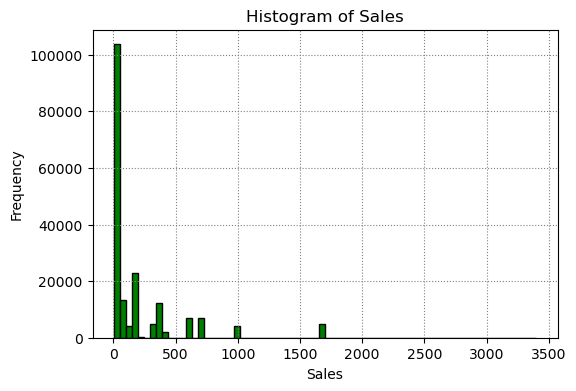

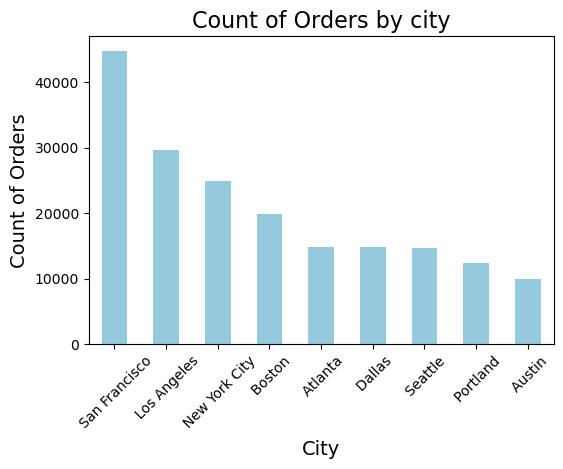

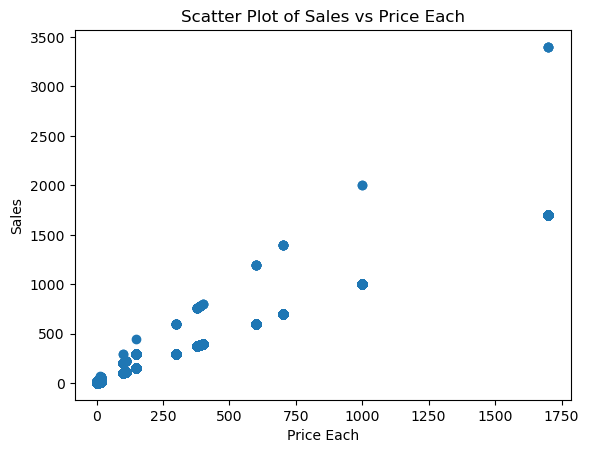

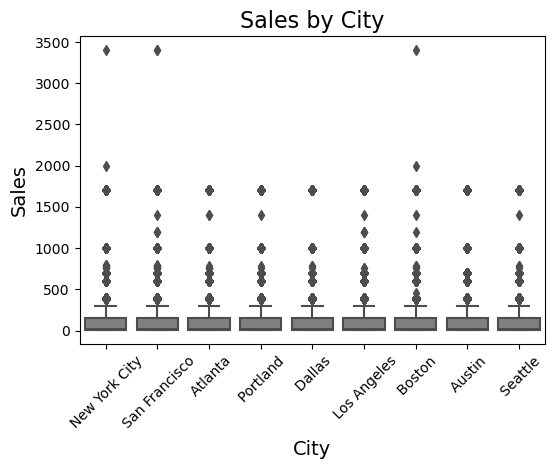

In [24]:

# Univariate analysis
# Plot a histogram of the sales data
plt.figure(figsize=(6,4))
plt.hist(data['Sales'], bins=70, edgecolor='black', color='green')
plt.grid(True, which='both', linestyle=':', color='grey')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Count of orders by country
city_order_count = data['City'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=city_order_count.index, y=city_order_count.values, color="skyblue", width=0.5)
plt.title('Count of Orders by city', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Bivariate analysis
# Plot a scatter plot of Sales vs Price Each
plt.scatter(data['Price Each'], data['Sales'])
plt.title('Scatter Plot of Sales vs Price Each')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

#Sales by City
plt.figure(figsize=(6, 4))
sns.boxplot(x='City', y='Sales', data=data, color='grey')
plt.title("Sales by City", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.xticks(rotation=45)
plt.show()






In [146]:
# Summary statistics for key variables
print(data['Sales'].describe())

count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64


In [26]:
# Grouped statistics
# Group by Category and calculate statistics
# 1. Group by region: Calculate the mean, median, mode, standard deviation, variance, and count of sales for each region.
category_stats = data.groupby('City')['Sales'].agg(['mean', 'median', 'std', 'var', 'count'])
print(category_stats)

# 2. Group by Product: Calculate the mean, median, mode, standard deviation, variance, and count of sales for each product.
# # Group by Product and calculate statistics
product_stats = data.groupby('Product')['Sales'].agg(['mean', 'median', 'std', 'var', 'count'])
print(product_stats)

                      mean  median         std            var  count
City                                                                
 Atlanta        187.856903   14.95  334.718438  112036.432697  14881
 Austin         183.703357   14.95  331.422431  109840.827851   9905
 Boston         183.688272   14.95  329.170753  108353.384852  19934
 Dallas         186.772969   14.95  334.470044  111870.210373  14820
 Los Angeles    184.177362   14.95  332.210665  110363.926184  29605
 New York City  187.502711   14.95  336.215735  113041.020623  24876
 Portland       186.160498   14.95  336.974374  113551.728415  12465
 San Francisco  184.704550   14.95  332.564510  110599.153097  44732
 Seattle        186.516120   14.95  329.067523  108285.434502  14732
                                   mean   median        std          var  \
Product                                                                    
20in Monitor                 110.740968   109.99   9.058423    82.055032   
27in 4K Gamin


### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


[' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']
T-test for  Austin and  Seattle:
T-statistic: -0.6559367604625335
P-value: 0.511870940488827
Fail to reject the null hypothesis. The sales in  Austin and  Seattle are not significantly different.



<Figure size 1000x600 with 0 Axes>

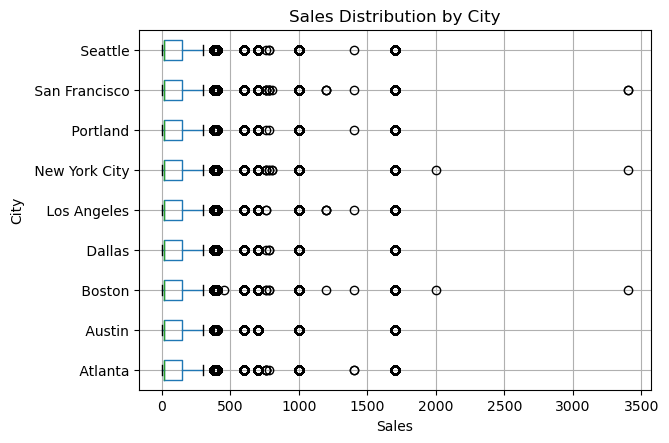

In [92]:
#Import necessary libraries
from scipy.stats import ttest_ind, chi2_contingency
import pandas as pd
from scipy import stats

#Clean the data
# Convert 'Sales' to numeric, if it's not already, and handle any non-numeric values
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

# Remove rows where 'Sales' or 'City' are missing
data = data.dropna(subset=['Sales', 'City'])

#Check the data for specific cities (regions) you want to compare
print(data['City'].unique()) #this will print all unique cities in your dataset

#Filter sales data for two specific cities (e.g., 'City A' and 'City B')
city_a_sales = data[data['City'] == 'City A']['Sales']
city_b_sales = data[data['City'] == 'City B']['Sales']
t_stat, p_value = ttest_ind(data_city1, data_city2)
print(f'T-test for {city1} and {city2}:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
        
if p_value < 0.05:
    print(f'Reject the null hypothesis. The sales in {city1} and {city2} are significantly different.')
else:
    print(f'Fail to reject the null hypothesis. The sales in {city1} and {city2} are not significantly different.')
        
print()

# Optional: Visualize the data distribution
plt.figure(figsize=(10, 6))
data.boxplot(column='Sales', by='City', vert=False)
plt.title('Sales Distribution by City')
plt.suptitle('')
plt.xlabel('Sales')
plt.show()

In [62]:
# Example: Chi-square test for independence between Ship Mode and Customer Segment
# Create a contingency table
contingency_table = pd.crosstab(data['City'], data['Product'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-Square Statistic:', chi2_stat)
print('P-Value:', p_value)
print('Degrees of Freedom:', dof)

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant association between City and Product.')
else:
    print('Fail to reject the null hypothesis. There is no significant association between City and Product.')

Chi-Square Statistic: 146.69444983203817
P-Value: 0.4219026900242017
Degrees of Freedom: 144
Fail to reject the null hypothesis. There is no significant association between City and Product.


                  Unnamed: 0  Order ID  Quantity Ordered  Price Each  \
Unnamed: 0          1.000000  0.357507         -0.003133    0.001471   
Order ID            0.357507  1.000000          0.000702   -0.002857   
Quantity Ordered   -0.003133  0.000702          1.000000   -0.148272   
Price Each          0.001471 -0.002857         -0.148272    1.000000   
Month               0.266516  0.993063          0.000791   -0.003375   
Sales               0.001373 -0.002949         -0.139417    0.999203   
Hour               -0.000875  0.001175         -0.002218    0.001721   

                     Month     Sales      Hour  
Unnamed: 0        0.266516  0.001373 -0.000875  
Order ID          0.993063 -0.002949  0.001175  
Quantity Ordered  0.000791 -0.139417 -0.002218  
Price Each       -0.003375  0.999203  0.001721  
Month             1.000000 -0.003466  0.001731  
Sales            -0.003466  1.000000  0.001668  
Hour              0.001731  0.001668  1.000000  


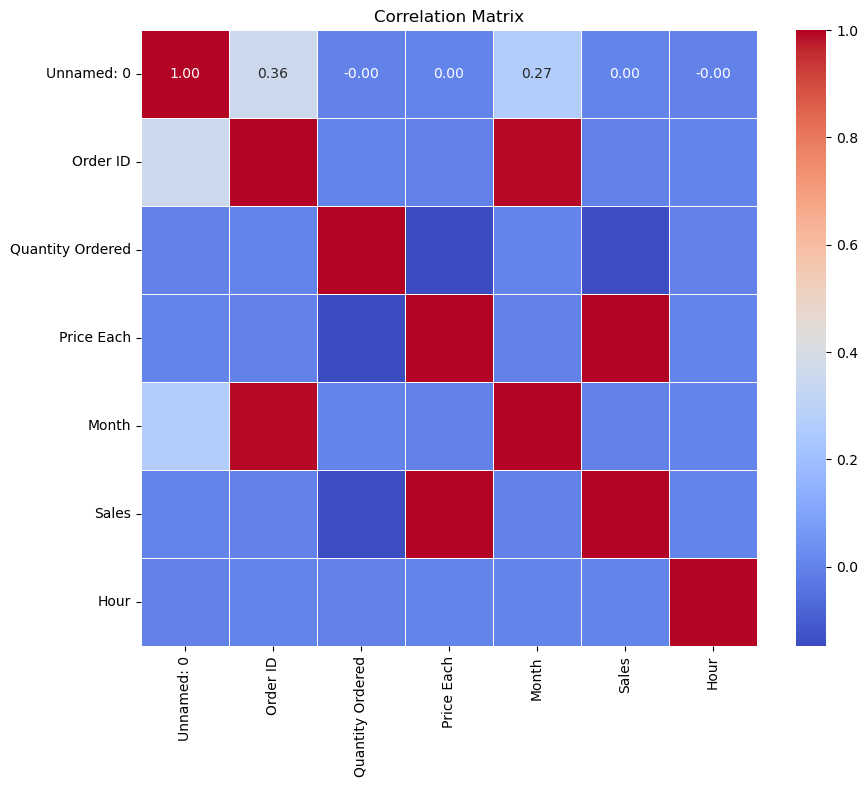

In [98]:
# Selecting only numeric columns for correlation matrix
# Clean the data if necessary (ensure that numeric columns are correctly formatted)
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')  # Example: make sure 'Sales' is numeric

# Select only numeric columns for correlation matrix (you can select specific columns if needed)
numeric_data = data.select_dtypes(include='number')  #['int64', 'float64']).columns

# Create a correlation matrix
correlation_matrix = numeric_data.corr()
 
# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


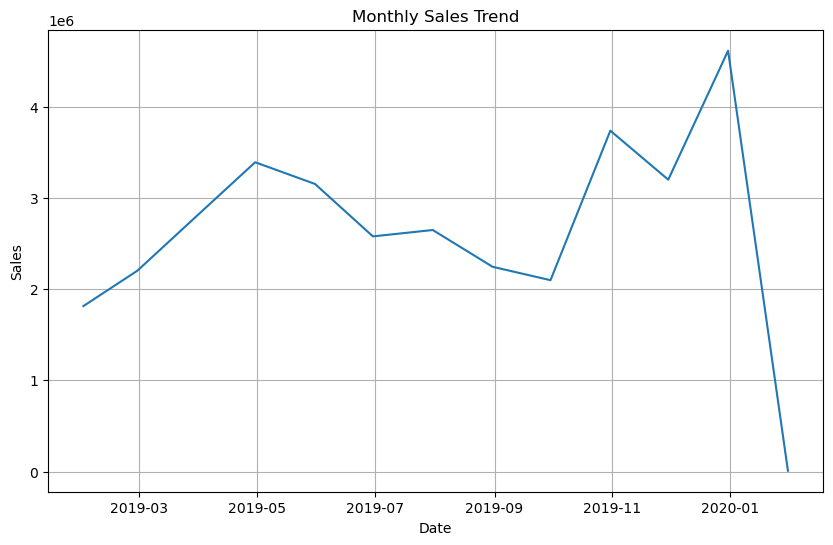

Date
2019-01-31    1813586.44
2019-02-28    2202022.42
2019-03-31    2807100.38
2019-04-30    3390670.24
2019-05-31    3152606.75
2019-06-30    2577802.26
2019-07-31    2647775.76
2019-08-31    2244467.88
2019-09-30    2097560.13
2019-10-31    3736726.88
2019-11-30    3199603.20
2019-12-31    4613443.34
2020-01-31       8670.29
Freq: M, Name: Sales, dtype: float64


In [228]:

# Plotting sales trends over time
data.reset_index(inplace=True)

# Group the data by month and calculate the total sales
monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum().reset_index()

# Rename the columns
monthly_sales.columns = ['Date', 'Sales']

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Resample sales data by month
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data by month
monthly_sales = data['Sales'].resample('M').sum()

# Print the resampled data
print(monthly_sales)




In [230]:

# Plotting profit trends over time
#in this data set we doesnt have proffit columns as well as cost column therefore i couldnt do it.



                       Product       Sales
13          Macbook Pro Laptop  8037600.00
18                      iPhone  4794300.00
14             ThinkPad Laptop  4129958.70
9                 Google Phone  3319200.00
1       27in 4K Gaming Monitor  2435097.56
3       34in Ultrawide Monitor  2355558.01
6     Apple Airpods Headphones  2349150.00
8                Flatscreen TV  1445700.00
7   Bose SoundSport Headphones  1345565.43
2             27in FHD Monitor  1132424.50


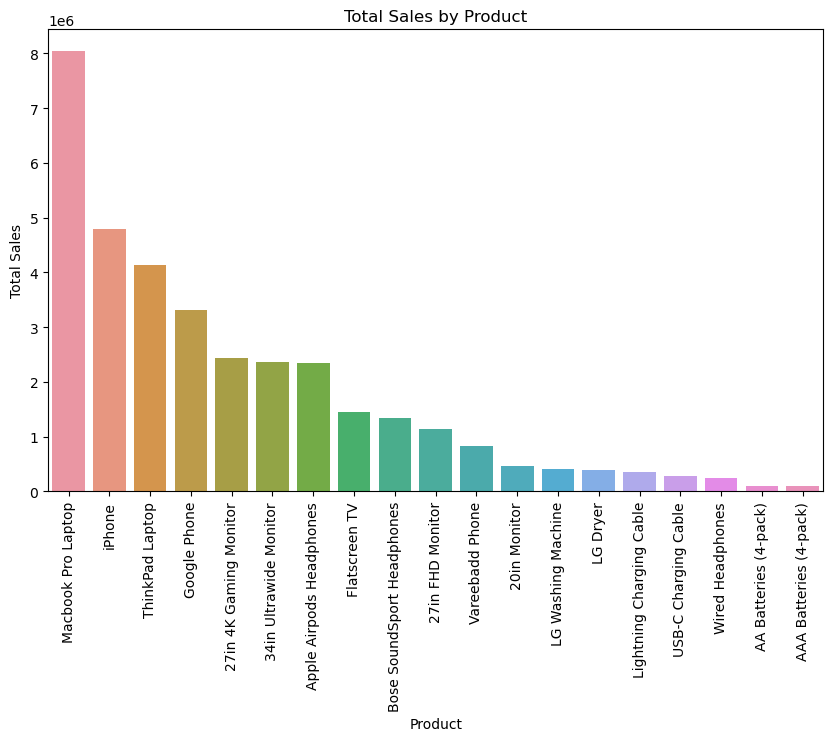

In [236]:

# Identifying top-performing product categories based on total sales and profit
# Group the data by product category and calculate the total sales
category_sales = data.groupby('Product')['Sales'].sum().reset_index()

# Sort the data by total sales in descending order
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Print the top performing product categories
print(category_sales.head(10))



# Plotting total sales by product category
# Group the data by product and calculate the total sales
product_sales = data.groupby('Product')['Sales'].sum().reset_index()

# Sort the data by total sales in descending order
product_sales = product_sales.sort_values(by='Sales', ascending=False)

# Plot the total sales by product using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Sales', data=product_sales)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()







# Plotting total profit by product category
#in this data set we doesnt have proffit columns as well as cost column therefore i couldnt do it.








In [258]:

# Generating summary statistics for each region
# Group the data by city and calculate summary statistics
city_stats = data.groupby('City')['Sales'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()

# Rename the columns
city_stats.columns = ['City', 'Number of Sales', 'Average Sales', 'Median Sales', 'Standard Deviation', 'Minimum Sales', 'Maximum Sales']

# Print the summary statistics
print(city_stats)



# Display summary statistics
# Calculate specific statistics for Sales
sales_stats = data['Sales'].agg(['count', 'mean', 'std', 'min', 'max'])

# Print the statistics
print("Sales Statistics:")
print(sales_stats)

             City  Number of Sales  Average Sales  Median Sales  \
0         Atlanta            14881     187.856903         14.95   
1          Austin             9905     183.703357         14.95   
2          Boston            19934     183.688272         14.95   
3          Dallas            14820     186.772969         14.95   
4     Los Angeles            29605     184.177362         14.95   
5   New York City            24876     187.502711         14.95   
6        Portland            12465     186.160498         14.95   
7   San Francisco            44732     184.704550         14.95   
8         Seattle            14732     186.516120         14.95   

   Standard Deviation  Minimum Sales  Maximum Sales  
0          334.718438           2.99         1700.0  
1          331.422431           2.99         1700.0  
2          329.170753           2.99         3400.0  
3          334.470044           2.99         1700.0  
4          332.210665           2.99         1700.0  
5    

Correlation Coefficients:
                      Sales  Price Each  Quantity Ordered
Sales             1.000000    0.999203         -0.139417
Price Each        0.999203    1.000000         -0.148272
Quantity Ordered -0.139417   -0.148272          1.000000


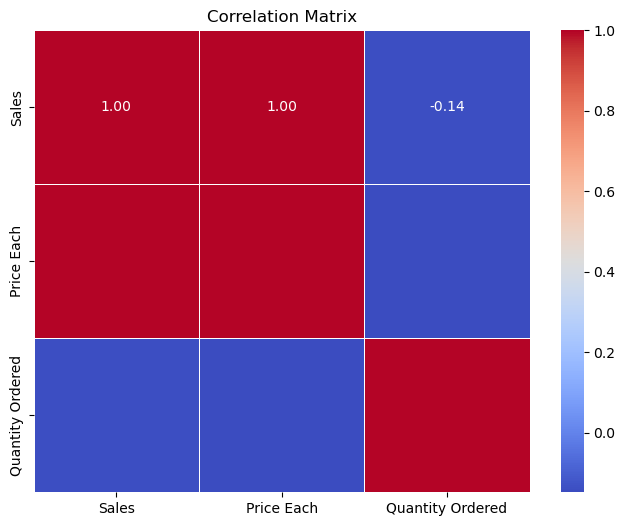

In [102]:

# Visualizing the correlation between sales and profit
#we have only sales data not have profit data if we have cost data available then we easily calculate the profit



# Displaying the correlation coefficient
# Clean the data if necessary
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')

# Select only the numeric columns for correlation
numeric_data = data[['Sales', 'Price Each', 'Quantity Ordered']]

#Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

#Display the correlation matrix
print("Correlation Coefficients:\n", correlation_matrix)

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

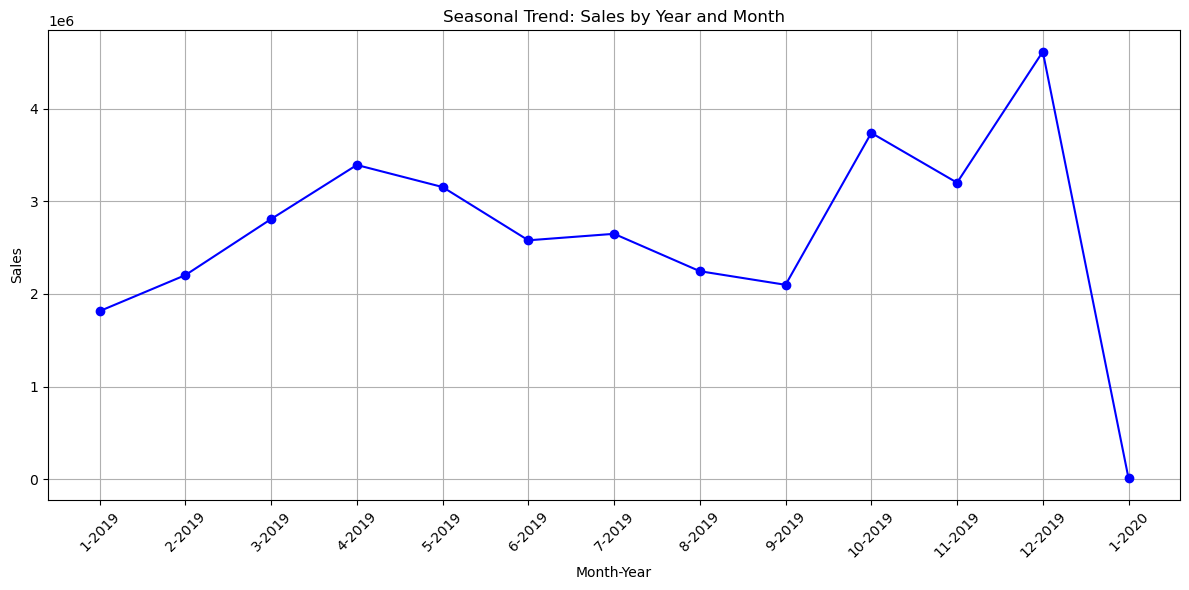

In [108]:
# Monthly Seasonal trends by line plot
# Clean the data if necessary
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')  # Convert 'Order Date' to datetime
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')  # Ensure 'Sales' is numeric

# Extract Year and Month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Group by Year and Month, then aggregate (e.g., sum of Sales)
seasonal_trends = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a "Month-Year" column for better visualization
seasonal_trends['Month-Year'] = seasonal_trends['Month'].astype(str) + '-' + seasonal_trends['Year'].astype(str)

# Plot the seasonal trend (Sales by Year and Month)
plt.figure(figsize=(12, 6))
plt.plot(seasonal_trends['Month-Year'], seasonal_trends['Sales'], marker='o', linestyle='-', color='b')
plt.title('Seasonal Trend: Sales by Year and Month')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

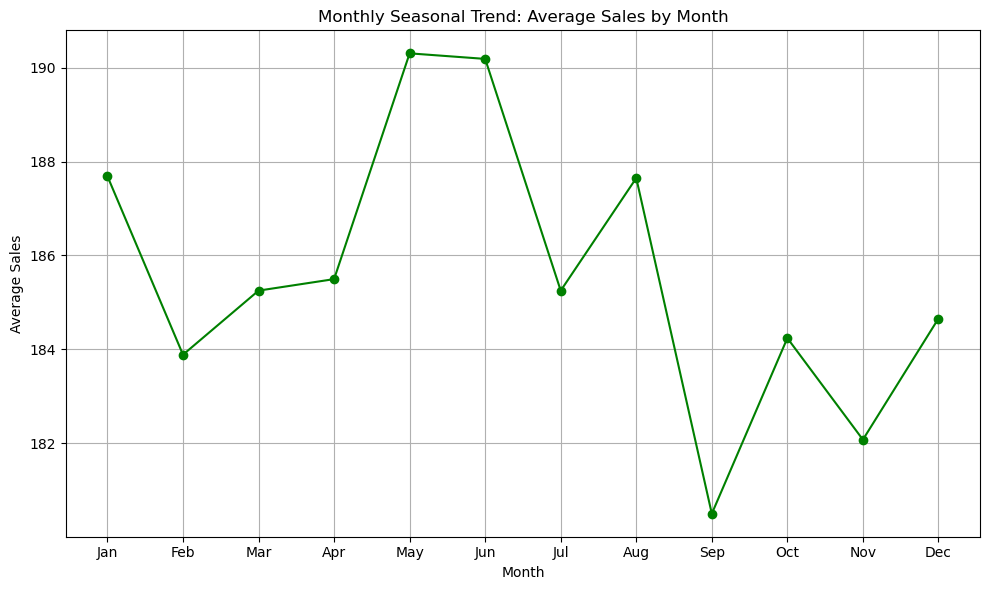

In [111]:
# Group by month to see the average sales per month across all years
monthly_trends = data.groupby('Month')['Sales'].mean().reset_index()

# Plot the seasonal trend (average sales by month)
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['Month'], monthly_trends['Sales'], marker='o', linestyle='-', color='g')
plt.title('Monthly Seasonal Trend: Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(monthly_trends['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


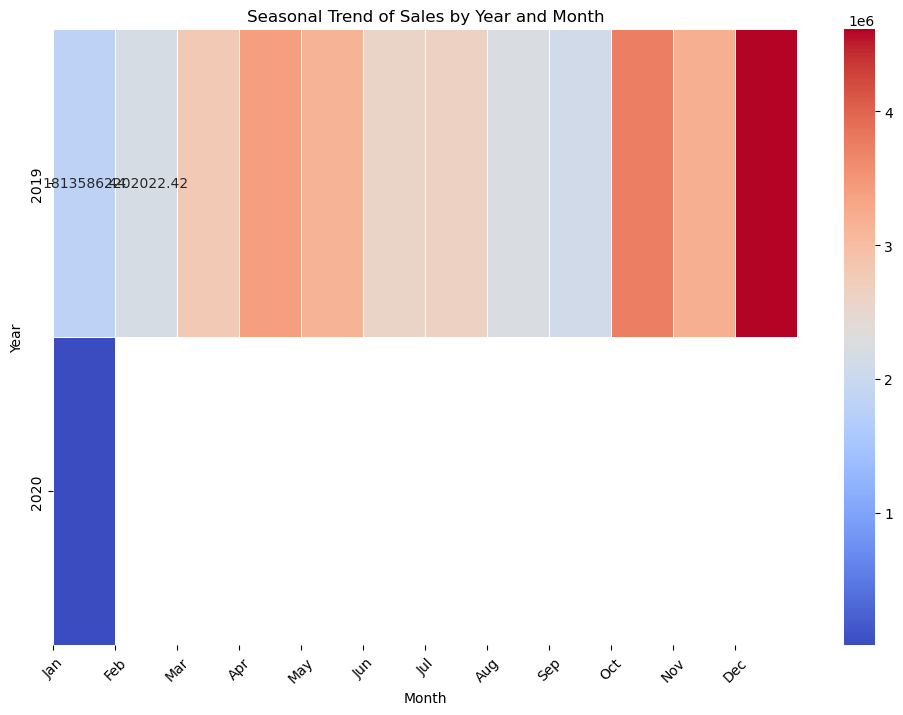

In [113]:
# Seasonal trennd by the Heatmap
# Clean the data if necessary
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')  # Convert 'Order Date' to datetime
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')  # Ensure 'Sales' is numeric

# Extract Year and Month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Group by Year and Month, then aggregate (e.g., sum of Sales)
seasonal_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Pivot the data so that Years are rows, Months are columns, and Sales is the value
pivot_sales = seasonal_sales.pivot(index='Year', columns='Month', values='Sales')

# Plot the seasonal trend as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sales, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Seasonal Trend of Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [205]:
# Comparing sales across different ship modes
# in this Sales Data not have any ships

Column names after cleaning:
Index(['unnamed:_0', 'order_id', 'product', 'quantity_ordered', 'price_each',
       'order_date', 'purchase_address', 'month', 'sales', 'city', 'hour'],
      dtype='object')
Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')
datetime64[ns]
Order Date
2019-01-31    1813586.44
2019-02-28    2202022.42
2019-03-31    2807100.38
2019-04-30    3390670.24
2019-05-31    3152606.75
2019-06-30    2577802.26
2019-07-31    2647775.76
2019-08-31    2244467.88
2019-09-30    2097560.13
2019-10-31    3736726.88
2019-11-30    3199603.20
2019-12-31    4613443.34
2020-01-31       8670.29
Freq: M, Name: Sales, dtype: float64


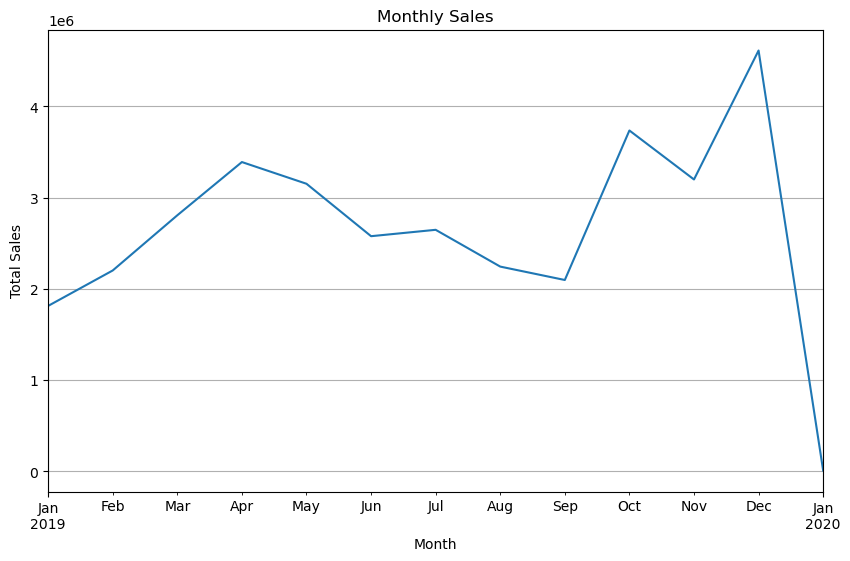

In [211]:
# load the dataset

df=pd.read_csv('Sales Data.csv')

# Ensure column names are clean
import pandas as pd
import scipy.stats as stats
df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_")

# Print column names to verify
print("Column names after cleaning:")
print(df.columns)

# Ensure 'Order Date' column is datetime type
# Import the pandas library: 
import pandas as pd
# Load your data into a pandas DataFrame: 
data = pd.read_csv('Sales Data.csv')

# Inspect the column names to check if 'Order Date' exists
print(data.columns)

# Convert 'Order Date' to datetime (if the column is named 'Order Date', otherwise update the name)
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Check the data type of the Ship Date column: 
print(data['Order Date'].dtype)

# Dropping rows where 'Order Date' couldn't be converted
data = data.dropna(subset=['Order Date'])

# Resample sales data by month
# Set 'Order Date' as the index for resampling
data.set_index('Order Date', inplace=True)

# Resample the data by month and sum the 'Sales' for each month
monthly_sales = data.resample('M')['Sales'].sum()

# Display the resampled data
print(monthly_sales)


monthly_sales_count = data.resample('M')['Sales'].count()  # Count of orders per month
monthly_sales_avg = data.resample('M')['Sales'].mean()    # Average sales per month

# Plotting the monthly sales data
monthly_sales.plot(figsize=(10, 6))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()